In [22]:
import pandas as pd

In [23]:
medical_df = pd.read_csv('medical-charges.csv')

In [24]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [25]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [26]:
medical_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [27]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [53]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [54]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

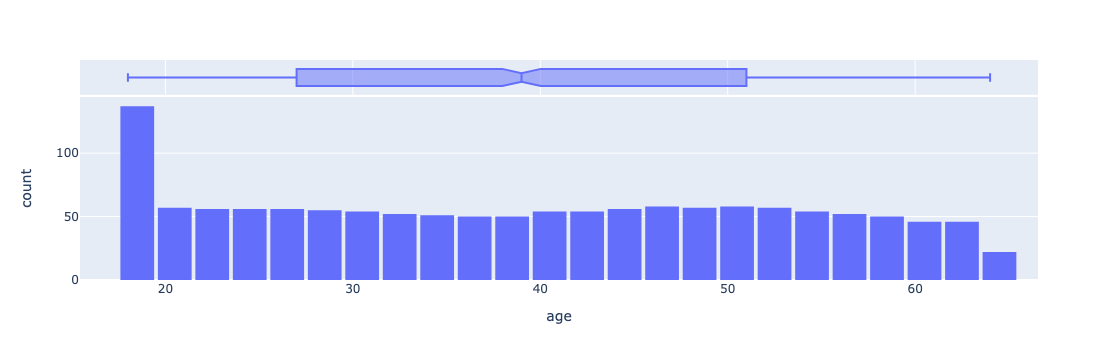

In [55]:
fig = px.histogram(medical_df, x='age', marginal='box')
fig.update_layout(bargap=0.1)
fig.show()

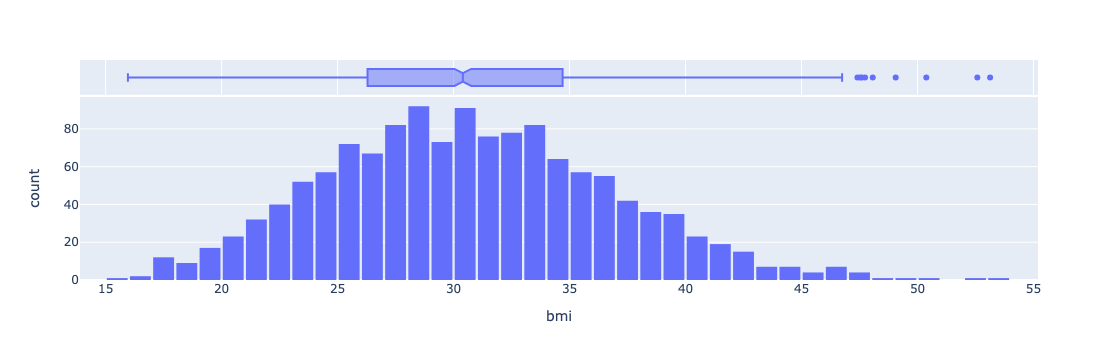

In [56]:
fig = px.histogram(medical_df, x='bmi', marginal = 'box')
fig.update_layout(bargap=0.1)
fig.show()

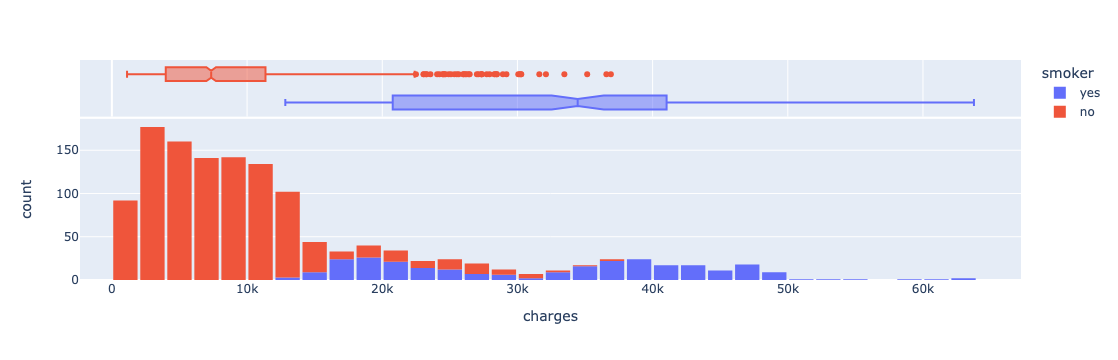

In [57]:
fig = px.histogram(medical_df, x = 'charges', marginal = 'box', color='smoker')
fig.update_layout(bargap =0.1)
fig.show()

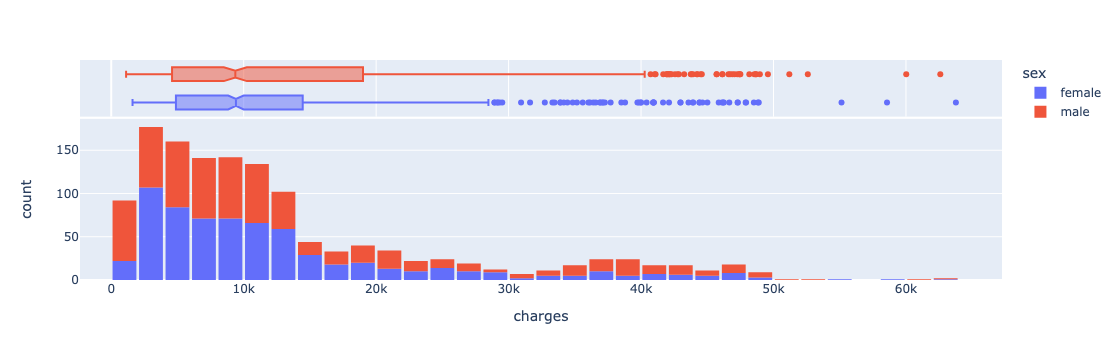

In [58]:
fig = px.histogram(medical_df, x = 'charges', marginal = 'box', color='sex')
fig.update_layout(bargap =0.1)
fig.show()

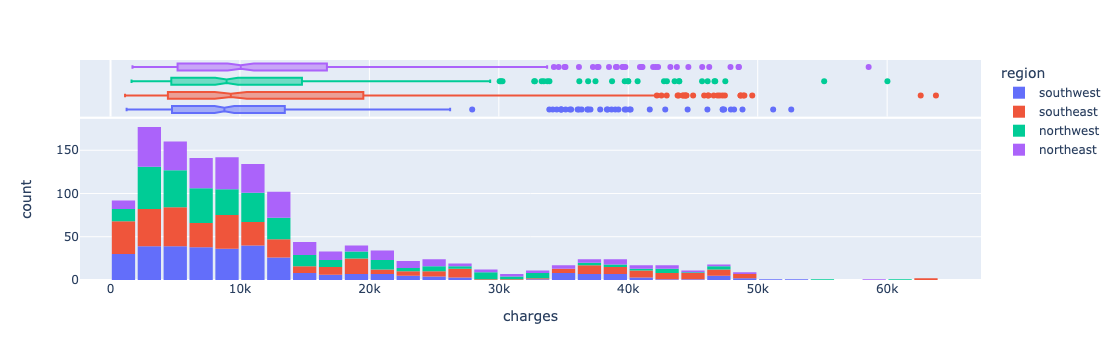

In [59]:
fig = px.histogram(medical_df, x = 'charges', marginal = 'box', color='region')
fig.update_layout(bargap =0.1)
fig.show()

### SMOKER

In [60]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

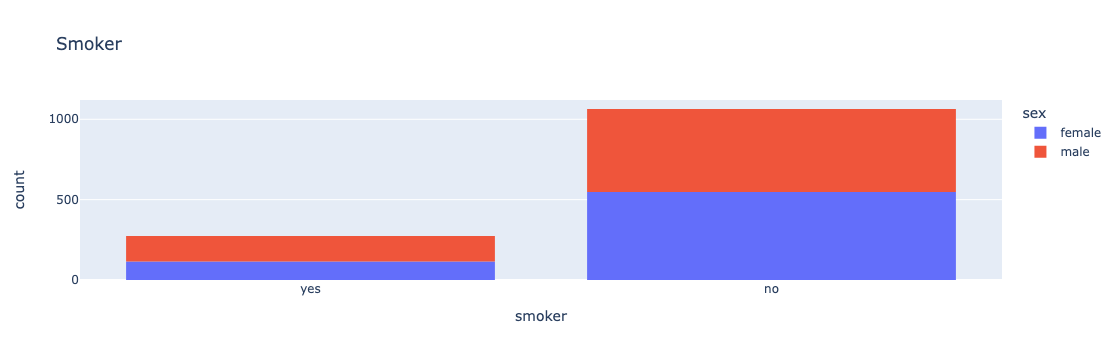

In [61]:
px.histogram(medical_df, x='smoker' , color='sex', title='Smoker')

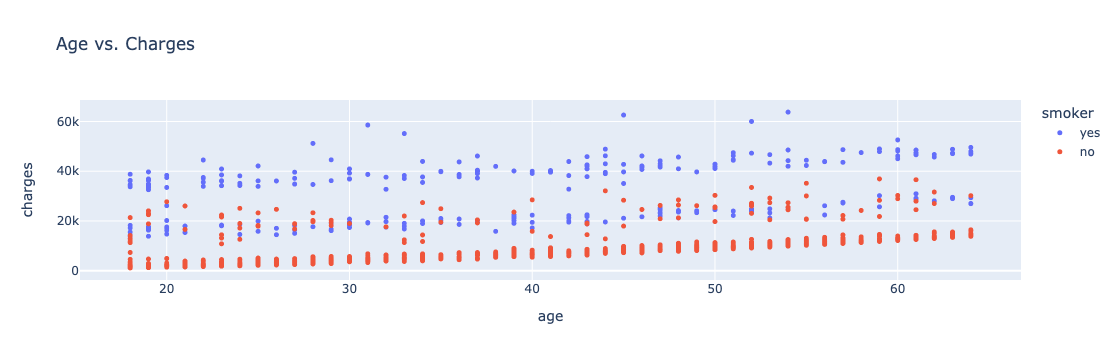

In [62]:
fig= px.scatter(medical_df, x='age',y='charges',color='smoker', title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

### BMI and Charges

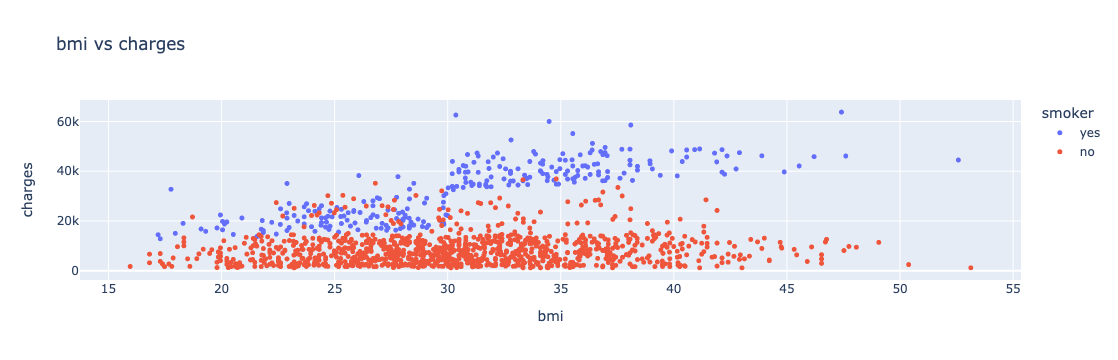

In [63]:
fig = px.scatter(medical_df, x = 'bmi', y='charges', hover_data=['sex'], color = 'smoker', title = 'bmi vs charges')
fig.update_traces(marker_size=5)
fig.show()

In [64]:
medical_df.charges.corr(medical_df.age)

0.2990081933306478

In [65]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

In [66]:
smoker_values = {'no':0, 'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984778

In [67]:
non_numeric_cols = medical_df.select_dtypes(include=['object']).columns
print(non_numeric_cols)

Index(['sex', 'smoker', 'region'], dtype='object')


#### Performing Onehot Encoding

In [68]:
medical_df_encoded = pd.get_dummies(medical_df)
corr_matrix = medical_df_encoded.corr()
print(corr_matrix)

                       age       bmi  children   charges  sex_female  \
age               1.000000  0.109272  0.042469  0.299008    0.020856   
bmi               0.109272  1.000000  0.012759  0.198341   -0.046371   
children          0.042469  0.012759  1.000000  0.067998   -0.017163   
charges           0.299008  0.198341  0.067998  1.000000   -0.057292   
sex_female        0.020856 -0.046371 -0.017163 -0.057292    1.000000   
sex_male         -0.020856  0.046371  0.017163  0.057292   -1.000000   
smoker_no         0.025019 -0.003750 -0.007673 -0.787251    0.076185   
smoker_yes       -0.025019  0.003750  0.007673  0.787251   -0.076185   
region_northeast  0.002475 -0.138156 -0.022808  0.006349    0.002425   
region_northwest -0.000407 -0.135996  0.024806 -0.039905    0.011156   
region_southeast -0.011642  0.270025 -0.023066  0.073982   -0.017117   
region_southwest  0.010016 -0.006205  0.021914 -0.043210    0.004184   

                  sex_male  smoker_no  smoker_yes  region_north

Text(0.5, 1.0, 'Correlation Matrix')

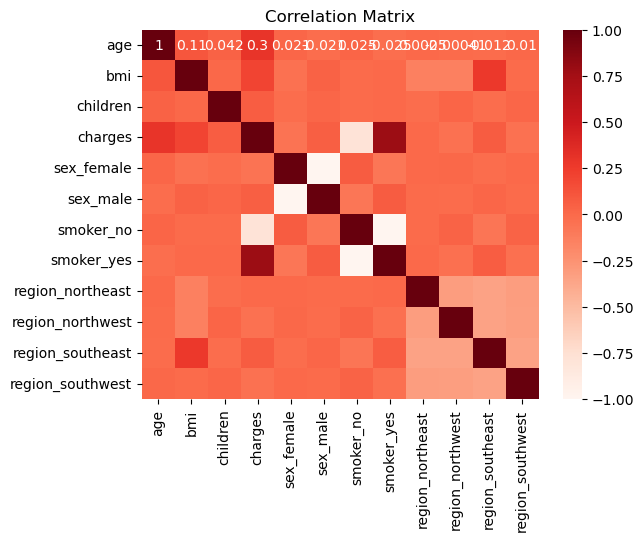

In [69]:
sns.heatmap(medical_df_encoded.corr(), cmap='Reds', annot = True)
plt.title('Correlation Matrix')

## Linear Regression Using Single Feature

In [70]:
non_smoker_df = medical_df[medical_df.smoker=='no']

<Axes: title={'center': 'Age vs Charge'}, xlabel='age', ylabel='charges'>

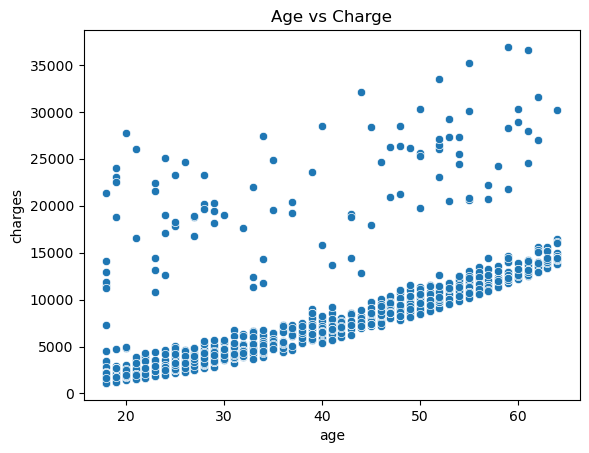

In [71]:
plt.title('Age vs Charge')
sns.scatterplot(data=non_smoker_df, x='age', y='charges')

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
model = LinearRegression()

In [74]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [76]:
inputs = non_smoker_df[['age']]
target = non_smoker_df.charges

In [77]:
model.fit(inputs,target)

LinearRegression()

In [79]:
prediction = model.predict(inputs)

In [81]:
prediction

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

### Using multiple features

In [83]:
input = non_smoker_df[['age','bmi']]
target = non_smoker_df['charges']

In [84]:
model = LinearRegression()

In [85]:
model.fit(input,target)

LinearRegression()

In [87]:
prediction=model.predict(input)
prediction

array([2749.08516308, 5412.40282772, 6673.94368635, ..., 2735.99553127,
       2770.87763119, 3493.32334862])

In [88]:
import numpy as np
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [90]:
loss = rmse(target, prediction)
loss

4662.3128354612945

In [92]:
input = non_smoker_df[['age','bmi','children']]
target = non_smoker_df['charges']

In [93]:
model = LinearRegression()

In [94]:
model.fit(input,target)

LinearRegression()

In [95]:
prediction = model.predict(input)
prediction

array([2724.94209163, 6535.13457204, 6065.27173951, ..., 2134.51524931,
       2160.54349555, 2898.08585583])

In [96]:
loss = rmse(target,prediction)
loss

4608.470405038246

### Medical charges for all the customers

In [97]:
input = medical_df[['age','children','bmi']]
target = medical_df['charges']

In [98]:
model = LinearRegression()

In [99]:
model.fit(input,target)

LinearRegression()

In [100]:
prediction = model.predict(input)
prediction

array([ 6908.77753344,  9160.97706103, 12390.94691779, ...,
        9640.92917145,  6691.39141657, 17377.08299024])

In [101]:
loss = rmse(target,prediction)
loss

11355.317901125973

#### Now we will use categorical features also

<Axes: xlabel='smoker', ylabel='charges'>

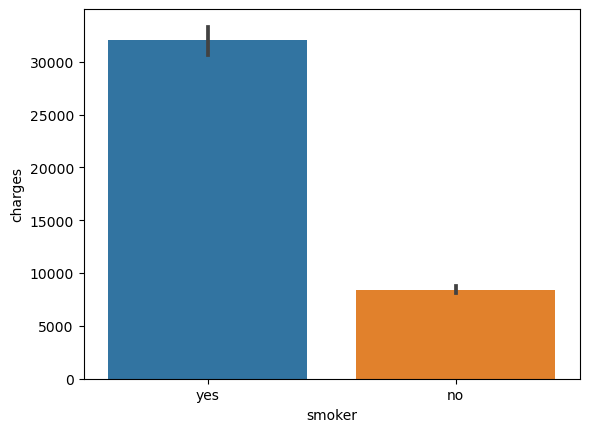

In [102]:
sns.barplot(data=medical_df, x='smoker', y='charges')

In [103]:
smoker_codes = {'no':0, 'yes':1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [104]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [105]:
input = medical_df[['age','bmi','children','smoker_code']]
target = medical_df['charges']

In [106]:
model = LinearRegression()

In [107]:
model.fit(input,target)

LinearRegression()

In [108]:
prediction = model.predict(input)

In [110]:
loss = rmse(target,prediction)
loss

6056.439217188081

Now, we can see that the loss has been reduced after using one of the categorical data.

<Axes: xlabel='sex', ylabel='charges'>

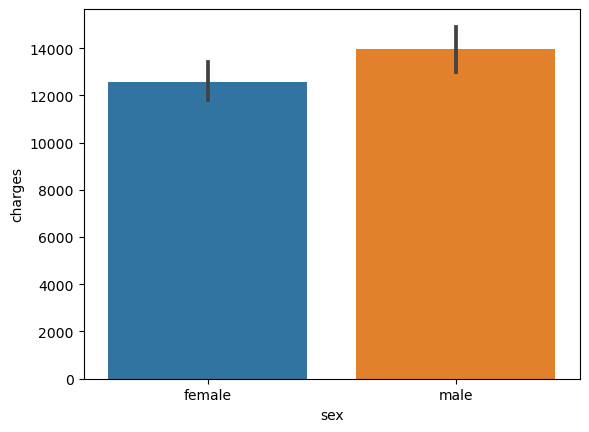

In [111]:
sns.barplot(data=medical_df, x='sex',y='charges')

In [112]:
sex_codes = {'male':1, 'female':0}

In [113]:
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [114]:
inputs = medical_df[['age','bmi','sex_code','children','smoker_code']]
target = medical_df['charges']

In [115]:
model = LinearRegression()

In [116]:
model.fit(inputs, target)

LinearRegression()

In [120]:
prediction = model.predict(inputs)
prediction

array([25661.85689486,  3818.77858262,  7096.73025538, ...,
        4465.88909619,  1676.96948913, 36863.89250792])

In [121]:
loss = rmse(target,prediction)
loss

6056.100708754546

Not a much decreament.

#### For other categorical data we are going to perform ONE-HOT ENCODING

<Axes: xlabel='region', ylabel='charges'>

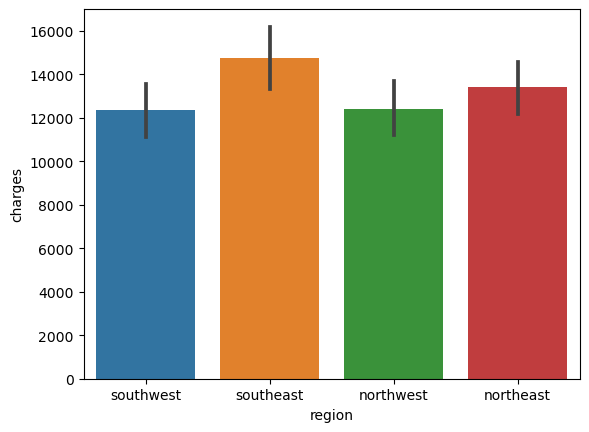

In [122]:
sns.barplot(data=medical_df, x='region', y='charges')

In [129]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [136]:
region_encoded = enc.transform(medical_df[['region']]).toarray()
region_encoded

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [137]:
encoded_feature_names = enc.get_feature_names_out(['region'])

In [138]:
region_encoded_df = pd.DataFrame(region_encoded, columns=encoded_feature_names)

In [140]:
medical_df_encoded = pd.concat([medical_df.drop(columns=['region']), region_encoded_df], axis=1)
medical_df_encoded

,age,sex,bmi,children,smoker,charges,smoker_code,sex_code,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,2007.94500,0,0,0.0,0.0,0.0,1.0


In [142]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,False,False,False,True
1,18,male,33.770,1,no,southeast,1725.55230,0,1,False,False,True,False
2,28,male,33.000,3,no,southeast,4449.46200,0,1,False,False,True,False
3,33,male,22.705,0,no,northwest,21984.47061,0,1,False,True,False,False
4,32,male,28.880,0,no,northwest,3866.85520,0,1,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,False,True,False,False
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,True,False,False,False
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,False,False,True,False
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,False,False,False,True


In [155]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [156]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [158]:
model.intercept_

-12525.547811195473

In [159]:
weights = pd.DataFrame({'feature':np.append(input_cols,1), 'weight':np.append(model.coef_,model.intercept_)})
weights

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


#### We will apply scaling

In [160]:
from sklearn.preprocessing import StandardScaler

In [161]:
numeric_cols = ['age','bmi','children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [162]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [163]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [165]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [166]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [168]:
inputs = np.concatenate((scaled_inputs,categorical_data),axis=1)
targets = medical_df.charges

In [169]:
model = LinearRegression()

In [170]:
model.fit(inputs,targets)

LinearRegression()

In [171]:
prediction = model.predict(inputs)
prediction

array([25293.7130284 ,  3448.60283431,  6706.9884907 , ...,
        4149.13248568,  1246.58493898, 37085.62326757])

In [173]:
loss = rmse(targets,prediction)
loss

6041.6796511744515

In [174]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


#### Important features are:

1. smoker
2. Age
3. BMI

### Creating Test Set

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [177]:
model = LinearRegression()

In [178]:
model.fit(inputs_train,targets_train)

LinearRegression()

In [179]:
predictions_test = model.predict(inputs_test)

In [181]:
loss = rmse(targets_test, predictions_test)
loss

7383.91783846771